### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries used for the model making
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Libraries used for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Applying the model for further use (in this case we have used Logistic Regression)

In [2]:
def apply_model(df):
    
    # Initializing the value of X and Y which is further used in the training purpose of the model
    x=df["Reviews"]
    y=df["Sentiment"]
    
    # Since X is an array of Single dimension it causes difficulty in the training phase, 
    # so we convert it into a double dimentional array
    x=np.array(x)
    
    # Here we split the data into training and test set 
    # Where  training set is used to train the model whereas test set is used to predict data
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
    
    # Since performing text analysis on normal text can be a tough job, so to avoid this hasle we use Countvectorizer
    # Definition of COUNTVECTORIZER
    # Scikit-learn's CountVectorizer is used to transform a corpora of text to a vector of term / token counts.
    # It also provides the capability to preprocess your text data prior to generating the vector representation
    # making it a highly flexible feature representation module for text.
    
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer=CountVectorizer()
    
    # The "train_x_vectors" are used to train the model.
    train_x_vectors=vectorizer.fit_transform(xtrain)
    
    # Whereas the "test_x_vectors" are used for the prediction.
    test_x_vectors=vectorizer.transform(xtest)
    
    # Initialization of the model 
    model=lr()
    
    # Training the model
    model.fit(train_x_vectors,ytrain)
    
    # Predicting the values
    ypred=model.predict(test_x_vectors)
    
    # Finding the accuracy of the model
    acc=accuracy_score(ypred,ytest)*100
    
    # Printing the required details
    print('\n')
    
    print("Accuracy of the model is = ",round(acc,ndigits=3),"%")
    print('\n')
    
    print("Here is an example to check whether the model works properly or not.")
    print('\n')
    
    print("The example text is =",xtest[10])
    print('\n')
    
    print("The Sentiment for the above stated text is ",str(model.predict(test_x_vectors[10])[0]))

## 2. Function used for visualization

In [3]:
def visualize(df,n,csv_opt):
    
    # Calculating the total number of Sentiments in the dataset
    l=len(df["Sentiment"])
    
    # Storig the name in which the image needs to be saved
    s=str(csv_opt[n])+".png"
    
    # Storing the name of the title in accordance to the choice made by the viewer
    ts=str(csv_opt[n])
    
    # Counting the total number of Positive, Moderate and Negative sentiments in the dataframe
    p=(df.loc[df["Sentiment"]=="Positive"])['Sentiment'].count()
    n=(df.loc[df["Sentiment"]=="Negative"])['Sentiment'].count()
    m=(df.loc[df["Sentiment"]=="Moderate"])['Sentiment'].count()
    
    # Initializing the list which is further used for visualizations
    lis=[p,m,n]
    
    # Printing the required values i.e.total number of Positive, Moderate and Negative sentiments in the dataframe.
    print("Total number of Reviews = ",l)
    print("Total number of Positive Reviews",p)
    print("Total number of Moderate Reviews",m)
    print("Total number of Negative Reviews",n)
    
    # Plotting the Pie chart
    plt.pie(lis,labels=["% of Positive \n Reviews","% of Moderate \n Reviews","% of Negative \n Reviews"],colors=["#99ff99","Yellow","Red"],autopct="%0.2f%%",explode=[0.1,0.15,0.1])
    
    # Giving a title to the plot
    plt.title(ts,color="#ababab")
    
    # Saving the figure for further use(Please remove the # sign in the next line to save the figure)
    plt.savefig(s,dpi=300)
    
    # Showing the plot
    plt.show()
    
    print('\n')
    print("If you wish to get further information")
    print('\n')

Enter  0  for  Exit
Enter  1  for  Iphone_11_pro_max
Enter  2  for  iphone11
Enter  3  for  one_plus_8
Enter  4  for  oneplus_7T
Enter  5  for  oneplus_nord
Enter  6  for  oppo_A52
Enter  7  for  Redmi_9A
Enter  8  for  Redmi_9_Prime
Enter  9  for  Samsung_Galaxy_M01_Core
Enter  10  for  samsung_s10


Enter your choice here= 2


You have selected  iphone11


The Shape of the Data is => (800, 5)


The no of null Values per column are:


Accuracy of the model is =  83.125 %


Here is an example to check whether the model works properly or not.


The example text is =   Bought iPhone 11 recently. I must admit - this phone is super cool. Design is good. Purple color looks fresh & soothing to your eyes. I was confused between mint green & this color but when i compared both at one of the apple stores, i just couldn't resist ordering the purple. During the launch of the phone, the new two cameras design appeared weird but when you unbox the phone it looks Stunning. Night mode is also too goo

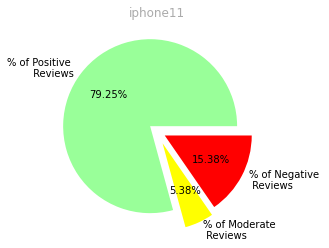



If you wish to get further information


Enter  0  for  Exit
Enter  1  for  Iphone_11_pro_max
Enter  2  for  iphone11
Enter  3  for  one_plus_8
Enter  4  for  oneplus_7T
Enter  5  for  oneplus_nord
Enter  6  for  oppo_A52
Enter  7  for  Redmi_9A
Enter  8  for  Redmi_9_Prime
Enter  9  for  Samsung_Galaxy_M01_Core
Enter  10  for  samsung_s10


Enter your choice here= 0


You have selected  Exit


In [4]:
# Initialising a dictionary containing all the names of the phones and their keys
csv_opt={0:"Exit",1:'Iphone_11_pro_max',2:'iphone11',3:'one_plus_8',4:'oneplus_7T',5:'oneplus_nord',6:'oppo_A52',7:'Redmi_9A',8:'Redmi_9_Prime',9:'Samsung_Galaxy_M01_Core',10:'samsung_s10'}

counter=1
while counter>0:
    # Printing the choices available for the user
    for key,value in csv_opt.items():
        print("Enter ",key," for ",value)
        
    print('\n')

    # Space for the user to enter it's Choice
    n=int(input("Enter your choice here= "))
    
    print('\n')
    print("You have selected ",csv_opt[n])

    # Initializing a String with the name of the csv to be loaded
    if n!=0:
        s="phone_csv/"+csv_opt[n]+".csv"
    else:
        break
    

    # Importing the Dataset
    df=pd.read_csv(s)

    # Chossing the required Columns that are to be used
    df=df[['Name',"Stars","Review Title","Reviews"]]

    sentiment=[] # List for storing the sentiments which further is added in the dataframe as a column "Sentiment"

    # Performing actions to get the sentiment with the help of the Stars given by the user out of 5
    for i in df["Stars"]:
        if int(i[0])<=5 and int(i[0])>=4:
            sentiment.append("Positive")
        if int(i[0])==3:
            sentiment.append("Moderate")
        if int(i[0])<3 and  int(i[0])>=1:
            sentiment.append("Negative")

    # Adding a column named "Sentiment" in the dataframe        
    df["Sentiment"]=sentiment
    print('\n')

    # Displaying the size of the dataframe
    print("The Shape of the Data is =>",df.shape)
    print('\n')

    # Displaying the null values in the Dataframe
    print("The no of null Values per column are:")
    df.isnull().sum()

    # Calling the function "apply_model" where model related things take place
    apply_model(df)

    # Calling the function "visualize" where data visualization takes place.
    visualize(df,n,csv_opt)